In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_theme(font_scale=1.5)

In [8]:
def readAndAverage(nThreads, filename):
    data = pd.read_csv("../spectral_data/" + filename, names=['E']);

    lineNo   = 1000;

    ionResults = np.zeros([1, 1000])
    for i in range(0, nThreads):
        ionResults += data.E[lineNo*i:lineNo*(i+1)]
        
    return ionResults;

def readAndAverage2D(nThreads, filename):
    
    Earray = np.round(np.logspace(np.log10(0.250), np.log10(1000), 100), 2)

    data = pd.read_csv("../spectral_data/" + filename, names=Earray);

    lineNo   = 1000;

    results = np.zeros([lineNo, 100]);
    for i in range(0, 2):
        results += data.values[lineNo*i:lineNo*(i+1), :]

    return results;
    
h = np.linspace(0, 999, 1000);
Earray = np.round(np.logspace(np.log10(0.250), np.log10(1000), 100), 2)

/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log10


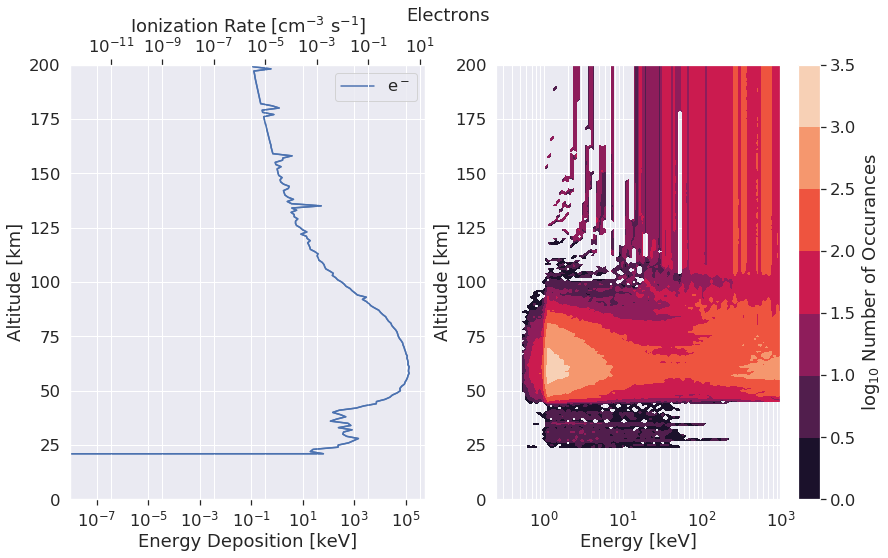

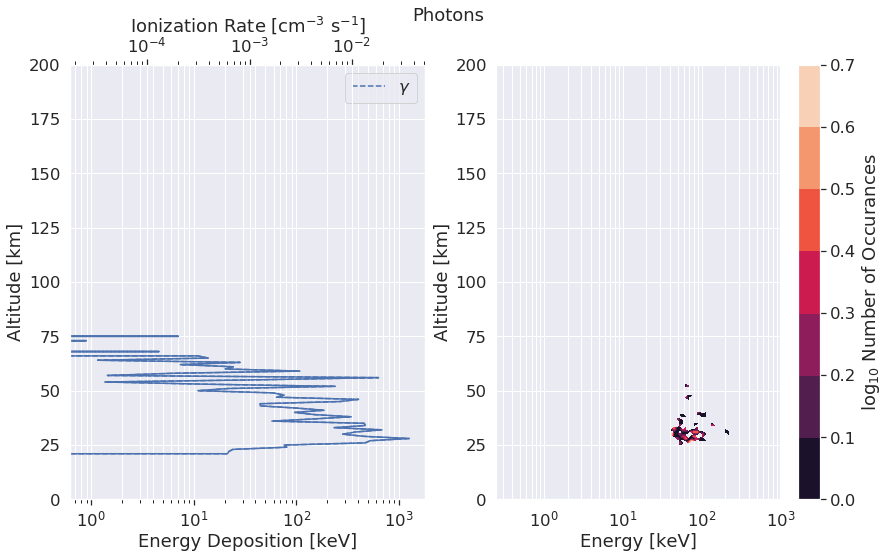

In [13]:

fn1 = "electron_dep_test.csv";
fn2 = "electron_ene_test.csv";
fn3 = "photon_dep_test.csv";
fn4 = "photon_ene_test.csv";

nThreads = 4;
ionResults = readAndAverage(nThreads, fn1);
EResults   = readAndAverage2D(nThreads, fn2);
ph_ionResults = readAndAverage(nThreads, fn3);
ph_EResults   = readAndAverage2D(nThreads, fn4);

plt.figure(figsize=(14,8)); plt.subplot(1,2,1); 
plt.grid(True, which='both')
plt.plot(ionResults[0,:], h, label='e$^-$');

plt.xscale('log');
plt.xlabel('Energy Deposition [keV]');
plt.ylabel('Altitude [km]');
plt.legend();
plt.ylim([0, 200]);

ax = plt.twiny();
ax.plot(ionResults[0,:]/35/1000, h);
ax.set_xscale('log');
ax.set_xlabel('Ionization Rate [cm$^{-3}$ s$^{-1}$]');


X,Y = np.meshgrid(Earray, h);

plt.subplot(1,2,2); plt.grid(True, which='both')
plt.contourf(X, Y, np.log10(EResults));
plt.colorbar(label='log$_{10}$ Number of Occurances');
#plt.contourf(ph_EResults[0,:], h, '--', label='$\gamma$');

plt.xscale('log');
plt.xlabel('Energy [keV]');
plt.ylabel('Altitude [km]');
plt.ylim([0, 200]);
plt.suptitle('Electrons', fontsize=18);


plt.figure(figsize=(14,8)); plt.subplot(1,2,1); plt.cla();
plt.grid(True, which='both')
plt.plot(ph_ionResults[0,:], h, '--', label='$\gamma$');

plt.xscale('log');
plt.xlabel('Energy Deposition [keV]');
plt.ylabel('Altitude [km]');
plt.legend();
plt.ylim([0, 200]);

ax = plt.twiny();
ax.plot(ph_ionResults[0,:]/35/1000, h);
ax.set_xscale('log');
ax.set_xlabel('Ionization Rate [cm$^{-3}$ s$^{-1}$]');


X,Y = np.meshgrid(Earray, h);

plt.subplot(1,2,2); plt.grid(True, which='both')
plt.contourf(X, Y, np.log10(ph_EResults));
plt.colorbar(label='log$_{10}$ Number of Occurances');

plt.xscale('log');
plt.xlabel('Energy [keV]');
plt.ylabel('Altitude [km]');
plt.ylim([0, 200]);
plt.suptitle('Photons', fontsize=18);

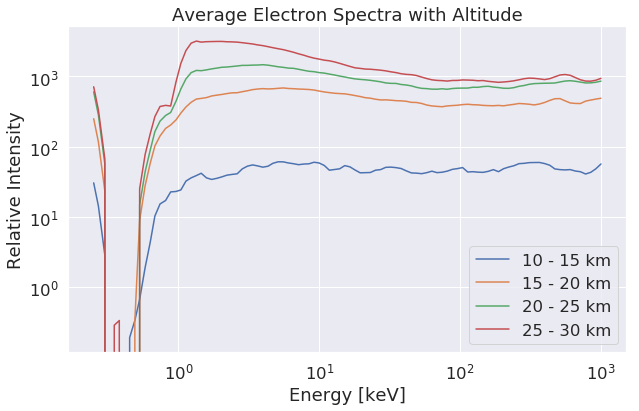

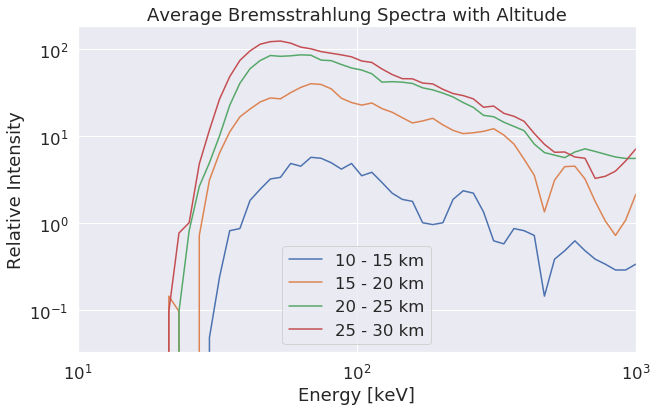

In [46]:
from scipy.signal import savgol_filter

plt.figure(figsize=(10,6));

startingAlt = 10;
stepSize    = 5;

for j in range(0, 4):
    
    h1 = startingAlt + j*stepSize;
    h2 = startingAlt + stepSize + j*stepSize;
    
    ave = np.zeros([1, len(Earray)])
    for i in range(h1, h2):
        ave += EResults[i, :]
    
    plt.loglog(Earray, savgol_filter(ave[0,:], 7, 2), label='%.0f - %.0f km' % (h1,h2));

plt.legend();
plt.xlabel('Energy [keV]');
plt.ylabel('Relative Intensity');
plt.title('Average Electron Spectra with Altitude');


plt.figure(figsize=(10,6));

for j in range(0, 4):
    
    h1 = startingAlt + j*stepSize;
    h2 = startingAlt + stepSize + j*stepSize;
    
    ave = np.zeros([1, len(Earray)])
    for i in range(h1, h2):
        ave += ph_EResults[i, :]
    
    plt.loglog(Earray, savgol_filter(ave[0,:], 7, 2), label='%.0f - %.0f km' % (h1,h2));

plt.legend();
plt.xlabel('Energy [keV]');
plt.ylabel('Relative Intensity');
plt.title('Average Bremsstrahlung Spectra with Altitude');
plt.xlim([1e1, 1e3]);

/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log10


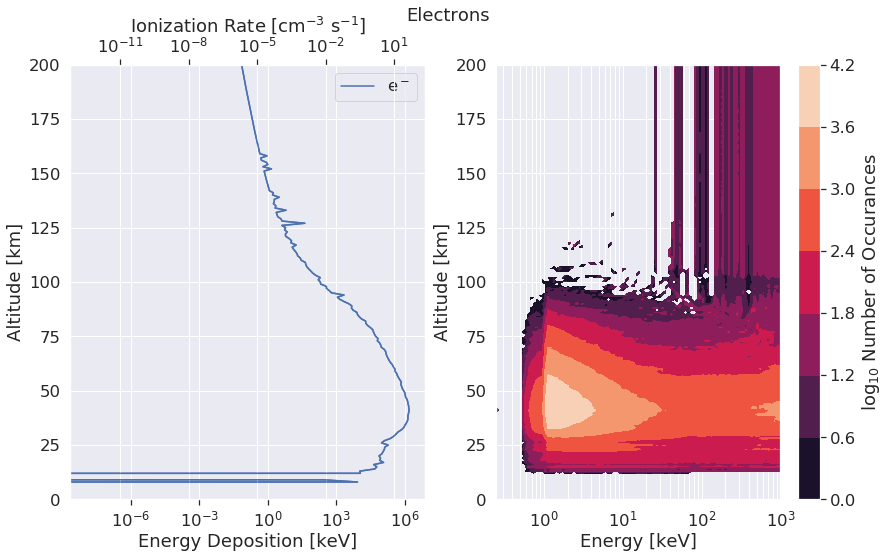

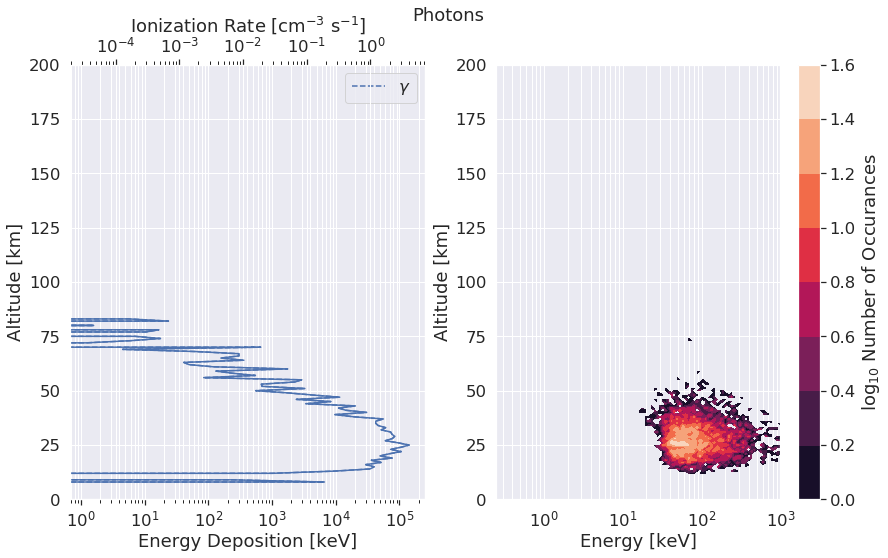

In [24]:

fn1 = "electron_dep_test10MeV.csv";
fn2 = "electron_ene_test10MeV.csv";
fn3 = "photon_dep_test10MeV.csv";
fn4 = "photon_ene_test10MeV.csv";

nThreads = 4;
ionResults = readAndAverage(nThreads, fn1);
EResults   = readAndAverage2D(nThreads, fn2);
ph_ionResults = readAndAverage(nThreads, fn3);
ph_EResults   = readAndAverage2D(nThreads, fn4);

plt.figure(figsize=(14,8)); plt.subplot(1,2,1); 
plt.grid(True, which='both')
plt.plot(ionResults[0,:], h, label='e$^-$');

plt.xscale('log');
plt.xlabel('Energy Deposition [keV]');
plt.ylabel('Altitude [km]');
plt.legend();
plt.ylim([0, 200]);

ax = plt.twiny();
ax.plot(ionResults[0,:]/35/1000, h);
ax.set_xscale('log');
ax.set_xlabel('Ionization Rate [cm$^{-3}$ s$^{-1}$]');


X,Y = np.meshgrid(Earray, h);

plt.subplot(1,2,2); plt.grid(True, which='both')
plt.contourf(X, Y, np.log10(EResults));
plt.colorbar(label='log$_{10}$ Number of Occurances');
#plt.contourf(ph_EResults[0,:], h, '--', label='$\gamma$');

plt.xscale('log');
plt.xlabel('Energy [keV]');
plt.ylabel('Altitude [km]');
plt.ylim([0, 200]);
plt.suptitle('Electrons', fontsize=18);


plt.figure(figsize=(14,8)); plt.subplot(1,2,1); plt.cla();
plt.grid(True, which='both')
plt.plot(ph_ionResults[0,:], h, '--', label='$\gamma$');

plt.xscale('log');
plt.xlabel('Energy Deposition [keV]');
plt.ylabel('Altitude [km]');
plt.legend();
plt.ylim([0, 200]);

ax = plt.twiny();
ax.plot(ph_ionResults[0,:]/35/1000, h);
ax.set_xscale('log');
ax.set_xlabel('Ionization Rate [cm$^{-3}$ s$^{-1}$]');


X,Y = np.meshgrid(Earray, h);

plt.subplot(1,2,2); plt.grid(True, which='both')
plt.contourf(X, Y, np.log10(ph_EResults));
plt.colorbar(label='log$_{10}$ Number of Occurances');

plt.xscale('log');
plt.xlabel('Energy [keV]');
plt.ylabel('Altitude [km]');
plt.ylim([0, 200]);
plt.suptitle('Photons', fontsize=18);

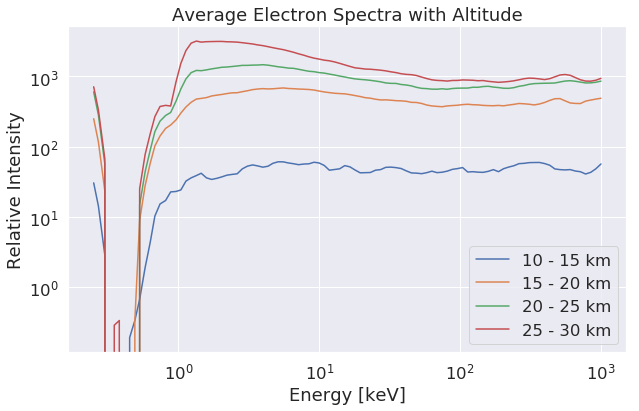

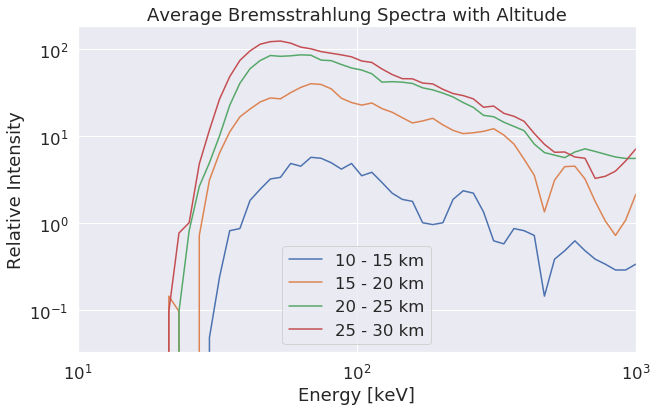

In [45]:
from scipy.signal import savgol_filter

plt.figure(figsize=(10,6));

startingAlt = 10;
stepSize    = 5;

for j in range(0, 4):
    
    h1 = startingAlt + j*stepSize;
    h2 = startingAlt + stepSize + j*stepSize;
    
    ave = np.zeros([1, len(Earray)])
    for i in range(h1, h2):
        ave += EResults[i, :]
    
    plt.loglog(Earray, savgol_filter(ave[0,:], 7, 2), label='%.0f - %.0f km' % (h1,h2));

plt.legend();
plt.xlabel('Energy [keV]');
plt.ylabel('Relative Intensity');
plt.title('Average Electron Spectra with Altitude');


plt.figure(figsize=(10,6));

for j in range(0, 4):
    
    h1 = startingAlt + j*stepSize;
    h2 = startingAlt + stepSize + j*stepSize;
    
    ave = np.zeros([1, len(Earray)])
    for i in range(h1, h2):
        ave += ph_EResults[i, :]
    
    plt.loglog(Earray, savgol_filter(ave[0,:], 7, 2), label='%.0f - %.0f km' % (h1,h2));

plt.legend();
plt.xlabel('Energy [keV]');
plt.ylabel('Relative Intensity');
plt.title('Average Bremsstrahlung Spectra with Altitude');
plt.xlim([1e1, 1e3]);